#HOML - Ch. 11: Training Deep Neural Networks

##Exercise 8: 
*Practice training a deep neural network on the CIFAR10 image dataset*


##He initialization and ELU activation

*a. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but
it’s the point of this exercise). Use He initialization and the ELU activation
function.*


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Random seed
tf.random.set_seed(99)
np.random.seed(99)

Let's start by loading the CIFAR10 dataset and separating it into training, validation, and test sets.

In [ ]:
# CIFAR10 dataset
(X_train_all, y_train_all), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_all[5000:]
y_train = y_train_all[5000:]
X_val = X_train_all[:5000]
y_val = y_train_all[:5000]

170500096/170498071 [==============================] - 4s 0us/step


Next, let's build the DNN. We'll use a for loop for the 20 hidden layers rather than listing every single layer. 

In [ ]:
# Input layer size based on CIFAR10 image size
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))

## Nadam optimization

*b. Using Nadam optimization and early stopping, train the network on the
CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_
data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000
for training, 10,000 for testing) with 10 classes, so you’ll need a softmax out‐
put layer with 10 neurons. Remember to search for the right learning rate each
time you change the model’s architecture or hyperparameters.*

Add the output layer - softmax with 10 neurons.

In [ ]:
model.add(keras.layers.Dense(10, activation="softmax"))

We'll next be building a Nadam optimizer. The author stated that he tried several different learning rates before settling on 5e-5. For the sake of time, let's start in that neighborhood with our performance learning rate scheduler.

In [ ]:
# Performance learning rate scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)

model = model

optimizer = keras.optimizers.Nadam(lr=6e-5)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 50
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_val, y_val),
                    callbacks=[lr_scheduler])

Epoch 1/50
1407/1407 [==============================] - 16s 7ms/step - loss: 7.3662 - accuracy: 0.1387 - val_loss: 2.3087 - val_accuracy: 0.1784
Epoch 2/50
1407/1407 [==============================] - 10s 7ms/step - loss: 2.0469 - accuracy: 0.2492 - val_loss: 2.0892 - val_accuracy: 0.2420
Epoch 3/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9073 - accuracy: 0.3035 - val_loss: 1.9368 - val_accuracy: 0.2950
Epoch 4/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8281 - accuracy: 0.3360 - val_loss: 1.7770 - val_accuracy: 0.3456
Epoch 5/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7758 - accuracy: 0.3556 - val_loss: 1.7419 - val_accuracy: 0.3600
Epoch 6/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7140 - accuracy: 0.3811 - val_loss: 1.7331 - val_accuracy: 0.3720
Epoch 7/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6803 - accuracy: 0.3874 - val_loss: 1.6917 - val_ac

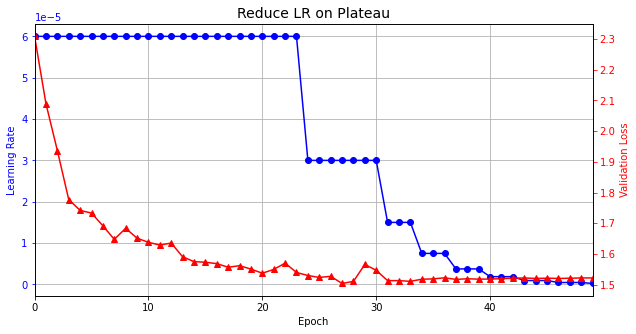

In [ ]:
# Graph of scheduler results
plt.figure(figsize=(10,5))
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

We'll use the learning rate where the validation loss is lowest. This isn't too far from the learning rate that the author used. We'll then introduce our callbacks - EarlyStopping and ModelCheckpoint. 

In [ ]:
keras.backend.clear_session()
from numpy.random import seed
seed(999)
tf.random.set_seed(999)   

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=1.5e-5),
              metrics=["accuracy"])

In [ ]:
# Define callback list
cifar10_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='cifar10.h5', save_best_only=True)
]    

In [ ]:
%%time

history = model.fit(X_train, y_train, epochs=50,
          validation_data=(X_val, y_val),
          callbacks=cifar10_callbacks, 
          verbose=1)

Epoch 1/50
1407/1407 [==============================] - 13s 7ms/step - loss: 1.2285 - accuracy: 0.5578 - val_loss: 1.5239 - val_accuracy: 0.4694
Epoch 2/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2294 - accuracy: 0.5610 - val_loss: 1.5334 - val_accuracy: 0.4670
Epoch 3/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2214 - accuracy: 0.5622 - val_loss: 1.5300 - val_accuracy: 0.4730
Epoch 4/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2189 - accuracy: 0.5642 - val_loss: 1.5323 - val_accuracy: 0.4678
Epoch 5/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2110 - accuracy: 0.5663 - val_loss: 1.5293 - val_accuracy: 0.4682
Epoch 6/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2153 - accuracy: 0.5631 - val_loss: 1.5371 - val_accuracy: 0.4714
Epoch 7/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2059 - accuracy: 0.5678 - val_loss: 1.5397 - val_ac

In [ ]:
# Graphs of accuracy and loss
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.figure(figsize=(12, 5))
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.title('Training and validation')
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

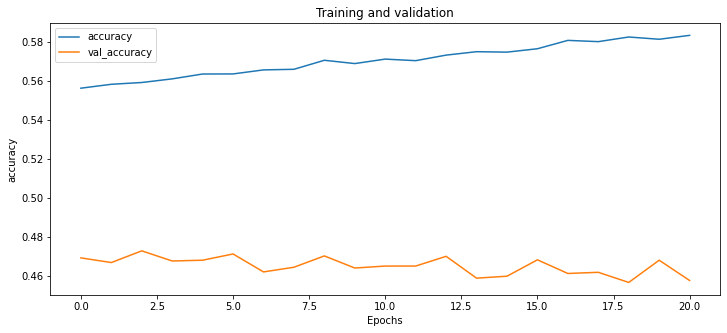

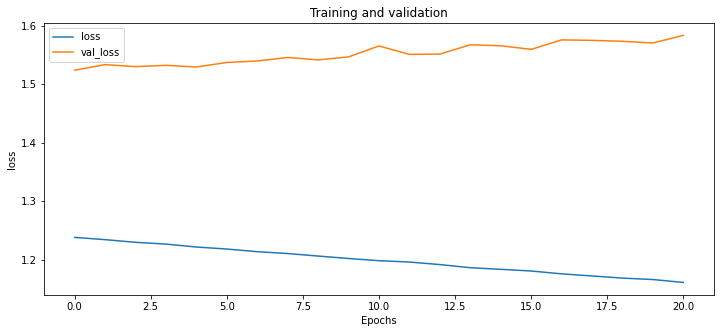

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
model = keras.models.load_model("cifar10.h5")
model.evaluate(X_val, y_val)

157/157 [==============================] - 0s 2ms/step - loss: 1.5239 - accuracy: 0.4694


[1.5239131450653076, 0.46939998865127563]

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5252 - accuracy: 0.4725


[1.5251818895339966, 0.4724999964237213]

Our training accuracy is a bit higher than the validation test accuracie, suggesting some amount of overfitting. However, all three are still very low. So, let's see if some other techniques will improve those accuracies, starting with Batch Normalization.

## Batch Normalization

*c. Now try adding Batch Normalization and compare the learning curves: Is it
converging faster than before? Does it produce a better model? How does it
affect training speed?*

In [ ]:
keras.backend.clear_session()
from numpy.random import seed
seed(999)
tf.random.set_seed(999) 

We'll add batch normalization after every dense layer (excluding the output layer) and the first hidden layer. 

In [ ]:
# Modified model with batch normalization
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Again, we'll start by using the performance learning rate scheduler to select an appropriate learning rate. 

In [ ]:
# Performance learning rate scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)

model = model

optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 50
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_val, y_val),
                    callbacks=[lr_scheduler])

Epoch 1/50
1407/1407 [==============================] - 35s 20ms/step - loss: 1.9730 - accuracy: 0.2927 - val_loss: 1.6479 - val_accuracy: 0.4100
Epoch 2/50
1407/1407 [==============================] - 27s 19ms/step - loss: 1.6775 - accuracy: 0.4065 - val_loss: 1.5967 - val_accuracy: 0.4274
Epoch 3/50
1407/1407 [==============================] - 27s 19ms/step - loss: 1.6030 - accuracy: 0.4280 - val_loss: 1.5350 - val_accuracy: 0.4594
Epoch 4/50
1407/1407 [==============================] - 27s 19ms/step - loss: 1.5493 - accuracy: 0.4499 - val_loss: 1.4797 - val_accuracy: 0.4708
Epoch 5/50
1407/1407 [==============================] - 27s 19ms/step - loss: 1.5024 - accuracy: 0.4647 - val_loss: 1.4524 - val_accuracy: 0.4814
Epoch 6/50
1407/1407 [==============================] - 27s 19ms/step - loss: 1.4537 - accuracy: 0.4851 - val_loss: 1.4646 - val_accuracy: 0.4784
Epoch 7/50
1407/1407 [==============================] - 27s 19ms/step - loss: 1.4435 - accuracy: 0.4869 - val_loss: 1.4177 -

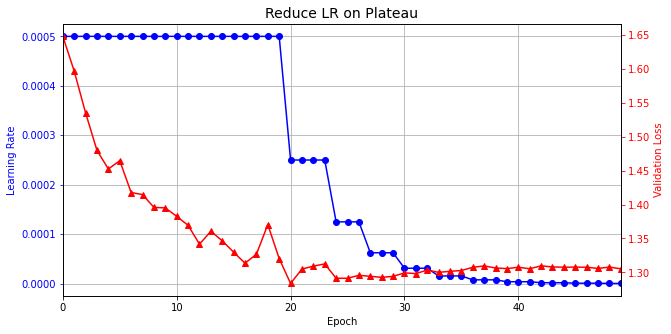

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [ ]:
keras.backend.clear_session()
from numpy.random import seed
seed(999)
tf.random.set_seed(999) 

The learning rate is fairly close to the author's 5e-4, but slightly smaller.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=2.5e-4),
              metrics=["accuracy"])

In [ ]:
cifar10_bn_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='cifar10_bn.h5', save_best_only=True)
]   

In [ ]:
%%time

history = model.fit(X_train, y_train, epochs=50,
          validation_data=(X_val, y_val),
          callbacks=cifar10_bn_callbacks, 
          verbose=1)

Epoch 1/50
1407/1407 [==============================] - 35s 20ms/step - loss: 0.9793 - accuracy: 0.6507 - val_loss: 1.3618 - val_accuracy: 0.5488
Epoch 2/50
1407/1407 [==============================] - 27s 19ms/step - loss: 0.9969 - accuracy: 0.6484 - val_loss: 1.3299 - val_accuracy: 0.5430
Epoch 3/50
1407/1407 [==============================] - 27s 19ms/step - loss: 0.9888 - accuracy: 0.6480 - val_loss: 1.3327 - val_accuracy: 0.5570
Epoch 4/50
1407/1407 [==============================] - 28s 20ms/step - loss: 0.9802 - accuracy: 0.6497 - val_loss: 1.3475 - val_accuracy: 0.5466
Epoch 5/50
1407/1407 [==============================] - 27s 19ms/step - loss: 0.9724 - accuracy: 0.6532 - val_loss: 1.3735 - val_accuracy: 0.5420
Epoch 6/50
1407/1407 [==============================] - 27s 19ms/step - loss: 0.9564 - accuracy: 0.6608 - val_loss: 1.3355 - val_accuracy: 0.5476
Epoch 7/50
1407/1407 [==============================] - 27s 19ms/step - loss: 0.9576 - accuracy: 0.6618 - val_loss: 1.3713 -

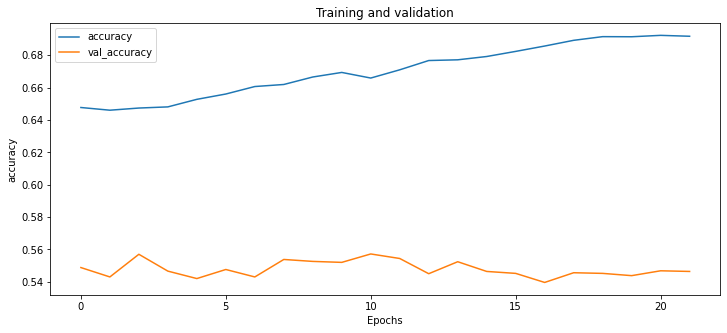

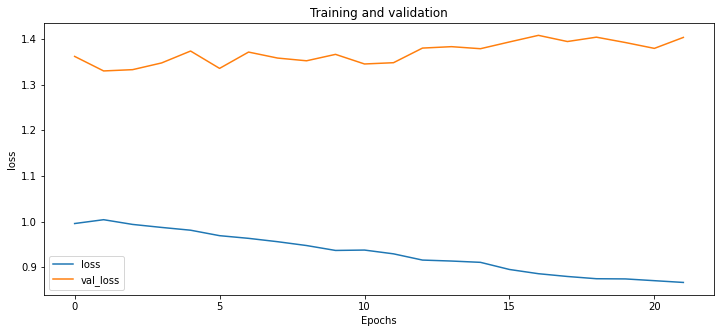

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
model = keras.models.load_model("cifar10_bn.h5")
model.evaluate(X_val, y_val)

157/157 [==============================] - 1s 3ms/step - loss: 1.3299 - accuracy: 0.5430


[1.3299379348754883, 0.5429999828338623]

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3613 - accuracy: 0.5286


[1.361257553100586, 0.5285999774932861]

To answer the author's questions:

*Is it converging faster than before?*  

Unlike the author's finding's batch normalization was just as fast in converging as the previous model, with both taking 5 epochs to reach the lowest validation loss. It was expected that batch would be faster. 

*Does it produce a better model?* 

Yes, it produces a model with a 52% test accuracy verses 47% for the previous model.

*How does it affect training speed?*

Batch was considerably slower, as expected, at just over 11 minutes versus 3 minutes. 

##SELU

*d. Try replacing Batch Normalization with SELU, and make the necessary adjust elements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a
sequence of dense layers, etc.).*

In [ ]:
keras.backend.clear_session()
from numpy.random import seed
seed(999)
tf.random.set_seed(999) 

In order to use SELU, we need to standardize the feature inputs, as the author suggested. That involves subtracting the mean of the training set from each of our sets and then dividing by the standard deviation of the training set.

In [ ]:
# Standardizing the input features for SELU
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train_scaled = (X_train - X_mean) / X_std
X_val_scaled = (X_val - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

We'll now reset our model, in a sense, by taking out all of the BatchNormalization layers and using SELU for our 20 hidden activation layers. We'll also replace He with LeCun for the kernel initializer. 

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
# Power rate scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)

model = model

optimizer = keras.optimizers.Nadam(lr=8e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 50
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[lr_scheduler])

Epoch 1/50
1407/1407 [==============================] - 13s 8ms/step - loss: 2.0958 - accuracy: 0.2532 - val_loss: 1.9276 - val_accuracy: 0.3272
Epoch 2/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7733 - accuracy: 0.3708 - val_loss: 1.7836 - val_accuracy: 0.3870
Epoch 3/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6567 - accuracy: 0.4131 - val_loss: 1.6448 - val_accuracy: 0.4212
Epoch 4/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5752 - accuracy: 0.4439 - val_loss: 1.6069 - val_accuracy: 0.4362
Epoch 5/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5164 - accuracy: 0.4641 - val_loss: 1.5888 - val_accuracy: 0.4460
Epoch 6/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4735 - accuracy: 0.4802 - val_loss: 1.5917 - val_accuracy: 0.4438
Epoch 7/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4281 - accuracy: 0.4981 - val_loss: 1.5832 - val_ac

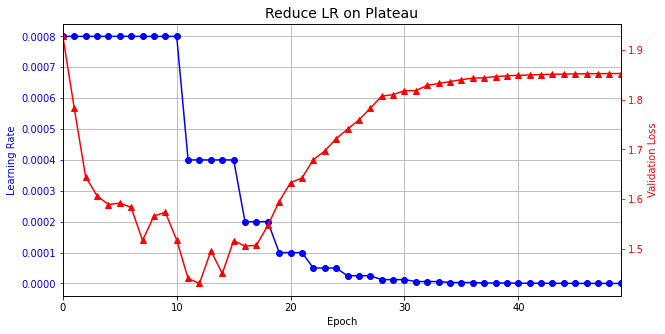

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

Again, the learning rate is similar to the author's 7e-4, though just slightly smaller.

In [ ]:
keras.backend.clear_session()
from numpy.random import seed
seed(999)
tf.random.set_seed(999) 

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=4e-4),
              metrics=["accuracy"])

In [ ]:
cifar10_selu_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='cifar10_selu.h5', save_best_only=True)
]   

In [ ]:
%%time

history = model.fit(X_train_scaled, y_train, epochs=50,
          validation_data=(X_val_scaled, y_val),
          callbacks=cifar10_selu_callbacks, 
          verbose=1)

Epoch 1/50
1407/1407 [==============================] - 13s 8ms/step - loss: 0.8168 - accuracy: 0.7253 - val_loss: 1.6408 - val_accuracy: 0.5114
Epoch 2/50
1407/1407 [==============================] - 11s 8ms/step - loss: 0.8451 - accuracy: 0.7147 - val_loss: 1.6215 - val_accuracy: 0.5104
Epoch 3/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.8394 - accuracy: 0.7140 - val_loss: 1.6530 - val_accuracy: 0.5084
Epoch 4/50
1407/1407 [==============================] - 11s 7ms/step - loss: 0.8260 - accuracy: 0.7201 - val_loss: 1.6556 - val_accuracy: 0.5160
Epoch 5/50
1407/1407 [==============================] - 11s 8ms/step - loss: 0.8166 - accuracy: 0.7243 - val_loss: 1.6339 - val_accuracy: 0.5144
Epoch 6/50
1407/1407 [==============================] - 11s 7ms/step - loss: 0.8034 - accuracy: 0.7305 - val_loss: 1.6657 - val_accuracy: 0.5076
Epoch 7/50
1407/1407 [==============================] - 11s 7ms/step - loss: 0.7855 - accuracy: 0.7364 - val_loss: 1.6864 - val_ac

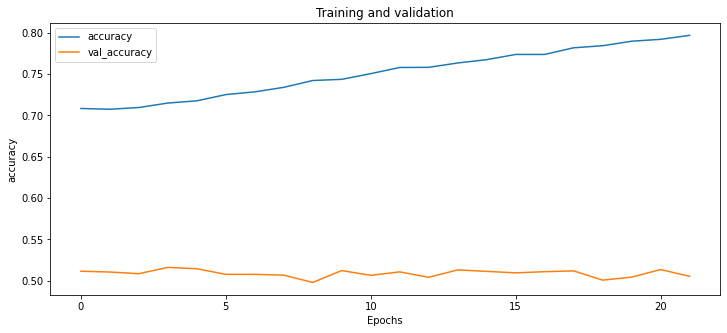

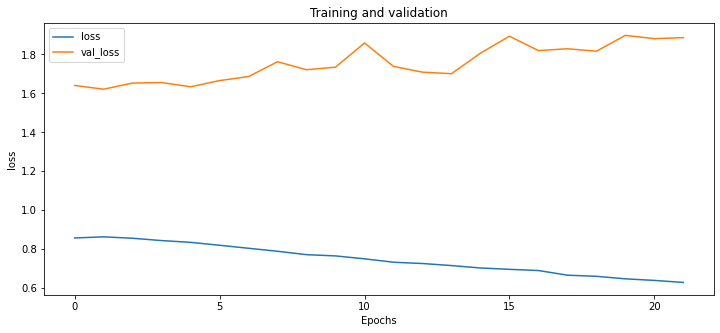

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
model = keras.models.load_model("cifar10_selu.h5")
model.evaluate(X_val_scaled, y_val)

157/157 [==============================] - 1s 2ms/step - loss: 1.6215 - accuracy: 0.5104


[1.6214789152145386, 0.5103999972343445]

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6224 - accuracy: 0.5030


[1.6224108934402466, 0.503000020980835]

The accuracy was not as high as the batch normalization model, though it was considerably faster.

##Alpha and MC Dropout 

*e. Try regularizing the model with alpha dropout. Then, without retraining your
model, see if you can achieve better accuracy using MC Dropout.*

In [ ]:
keras.backend.clear_session()
from numpy.random import seed
seed(999)
tf.random.set_seed(999) 

We'll keep the same model that we used in part e, but we'll now add an AlphaDropout layer between the Dense layers and the output layer.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
# Performance learning rate scheduler
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)

model = model

optimizer = keras.optimizers.Nadam(lr=6e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 50
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[lr_scheduler])

Epoch 1/50
1407/1407 [==============================] - 13s 8ms/step - loss: 2.0836 - accuracy: 0.2647 - val_loss: 1.7635 - val_accuracy: 0.3750
Epoch 2/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.7046 - accuracy: 0.4008 - val_loss: 1.6967 - val_accuracy: 0.4138
Epoch 3/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6004 - accuracy: 0.4351 - val_loss: 1.6579 - val_accuracy: 0.4304
Epoch 4/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5320 - accuracy: 0.4642 - val_loss: 1.5605 - val_accuracy: 0.4498
Epoch 5/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4679 - accuracy: 0.4838 - val_loss: 1.5834 - val_accuracy: 0.4692
Epoch 6/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4207 - accuracy: 0.5051 - val_loss: 1.5651 - val_accuracy: 0.4680
Epoch 7/50
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3834 - accuracy: 0.5168 - val_loss: 1.5385 - val_ac

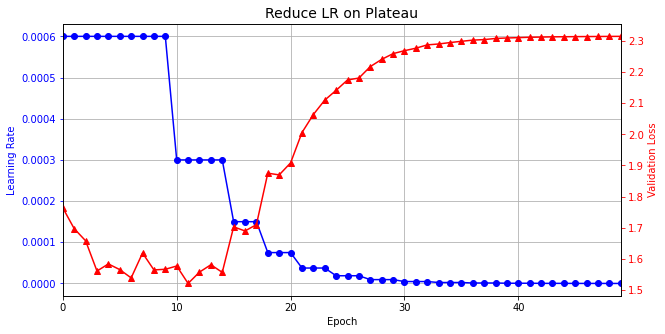

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

The author used a learning rate of 5e-4, and our learning rate is close to that. Though it is interesting to note that, unlike our other models, the validation loss increases dramatically after a certain learning rate. Perhaps a larger learning rate is just not able to find the ideal minimum. 

In [ ]:
keras.backend.clear_session()
from numpy.random import seed
seed(999)
tf.random.set_seed(999) 

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=3e-4),
              metrics=["accuracy"])

In [ ]:
cifar10_alpha_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='cifar10_alpha.h5', save_best_only=True)
]   

In [ ]:
%%time

history = model.fit(X_train_scaled, y_train, epochs=50,
          validation_data=(X_val_scaled, y_val),
          callbacks=cifar10_alpha_callbacks, 
          verbose=1)

Epoch 1/50
1407/1407 [==============================] - 13s 8ms/step - loss: 0.7875 - accuracy: 0.7323 - val_loss: 1.9019 - val_accuracy: 0.5068
Epoch 2/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.8120 - accuracy: 0.7234 - val_loss: 1.8533 - val_accuracy: 0.5070
Epoch 3/50
1407/1407 [==============================] - 11s 7ms/step - loss: 0.7974 - accuracy: 0.7261 - val_loss: 2.0019 - val_accuracy: 0.5162
Epoch 4/50
1407/1407 [==============================] - 11s 8ms/step - loss: 0.7898 - accuracy: 0.7333 - val_loss: 1.8190 - val_accuracy: 0.5098
Epoch 5/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.7618 - accuracy: 0.7408 - val_loss: 1.9113 - val_accuracy: 0.5128
Epoch 6/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.7510 - accuracy: 0.7471 - val_loss: 2.0283 - val_accuracy: 0.5054
Epoch 7/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.7398 - accuracy: 0.7504 - val_loss: 1.9378 - val_ac

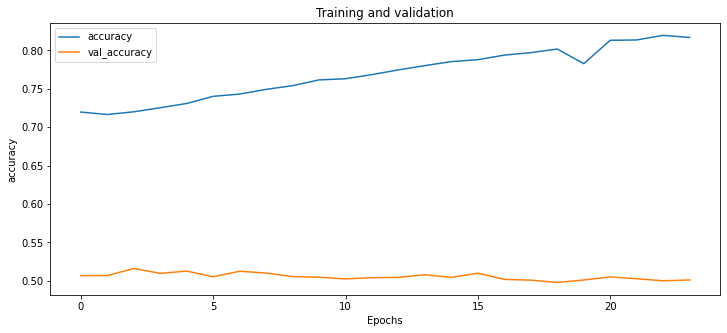

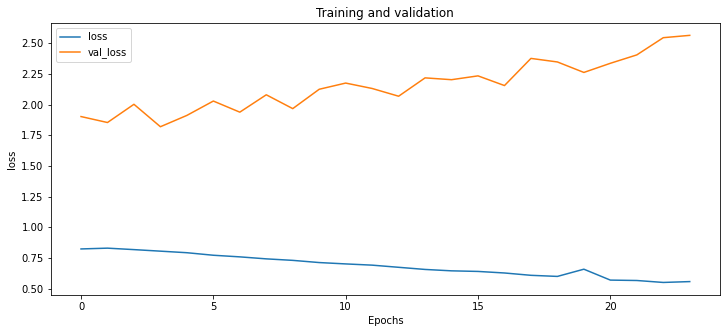

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
model = keras.models.load_model("cifar10_alpha.h5")
model.evaluate(X_val_scaled, y_val)

157/157 [==============================] - 1s 2ms/step - loss: 1.8190 - accuracy: 0.5098


[1.8190052509307861, 0.5098000168800354]

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7976 - accuracy: 0.5130


[1.7976340055465698, 0.5130000114440918]

Our results didn't improve much by adding AlphaDropout. In fact, the accuracy is still below what we achieved with BatchNormalization. Next, we'll implement MC Dropout without retraining the model. We'll have to use a for loop to replace the AlphaDropout layer with MC Dropout. 

In [ ]:

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [ ]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [ ]:
mc_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=3e-4),
              metrics=["accuracy"])

In [ ]:
cifar10_mcalpha_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='cifar10_mcalpha.h5', save_best_only=True)
]    

In [ ]:
%%time

history = mc_model.fit(X_train_scaled, y_train, epochs=50,
          validation_data=(X_val_scaled, y_val),
          callbacks=cifar10_mcalpha_callbacks, 
          verbose=1)

Epoch 1/50
1407/1407 [==============================] - 13s 8ms/step - loss: 0.7116 - accuracy: 0.7595 - val_loss: 1.8241 - val_accuracy: 0.5094
Epoch 2/50
1407/1407 [==============================] - 11s 8ms/step - loss: 0.6886 - accuracy: 0.7730 - val_loss: 1.8457 - val_accuracy: 0.5030
Epoch 3/50
1407/1407 [==============================] - 11s 8ms/step - loss: 0.6755 - accuracy: 0.7740 - val_loss: 2.0206 - val_accuracy: 0.5096
Epoch 4/50
1407/1407 [==============================] - 11s 8ms/step - loss: 0.6686 - accuracy: 0.7756 - val_loss: 1.8547 - val_accuracy: 0.5038
Epoch 5/50
1407/1407 [==============================] - 11s 8ms/step - loss: 0.6474 - accuracy: 0.7839 - val_loss: 1.8839 - val_accuracy: 0.5024
Epoch 6/50
1407/1407 [==============================] - 11s 8ms/step - loss: 0.6395 - accuracy: 0.7867 - val_loss: 1.9581 - val_accuracy: 0.5106
Epoch 7/50
1407/1407 [==============================] - 11s 8ms/step - loss: 0.6219 - accuracy: 0.7914 - val_loss: 1.9683 - val_ac

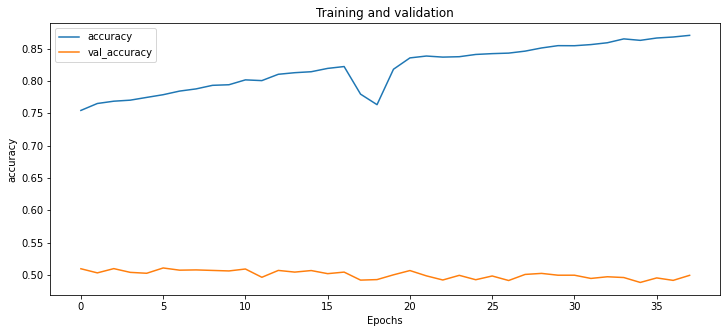

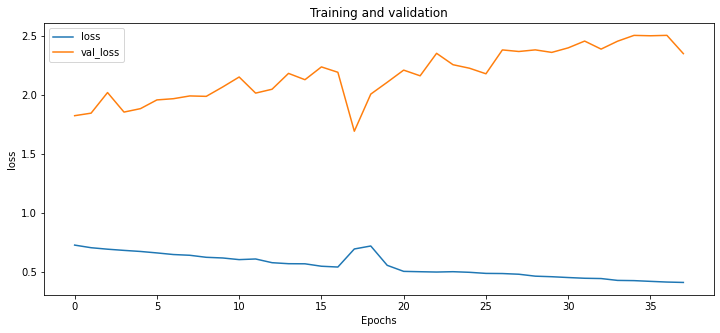

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [ ]:
keras.backend.clear_session()
from numpy.random import seed
seed(999)
tf.random.set_seed(999) 

In [ ]:
y_pred = mc_dropout_predict_classes(mc_model, X_val_scaled)
accuracy = np.mean(y_pred == y_val[:, 0])
accuracy

0.4948

In [ ]:
y_pred_test = mc_dropout_predict_classes(mc_model, X_test_scaled)
accuracy_test = np.mean(y_pred_test == y_test[:, 0])
accuracy_test

0.4923

The accuracy for MCDropout is slightly lower than AlphaDropout, but not significantly so. Batch normalization is still our best model.

##1cycle Scheduling

*f. Retrain your model using 1cycle scheduling and see if it improves training
speed and model accuracy*

In [ ]:
keras.backend.clear_session()
from numpy.random import seed
seed(999)
tf.random.set_seed(999) 

In order to use 1cycle scheduling, we'll first need to implement an exponential learning rate class to determine an ideal learning rate. 

In [ ]:
import math

K = keras.backend

# Exponential learning rate class

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))


Here, we're using an SGD optimizer rather than Nadam as with our prervious models. The author fails to state why, but it may be because using Nadam doesn't produce the necessary training loss spike below.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

352/352 [==============================] - 2s 5ms/step - loss: 8.6633 - accuracy: 0.0340


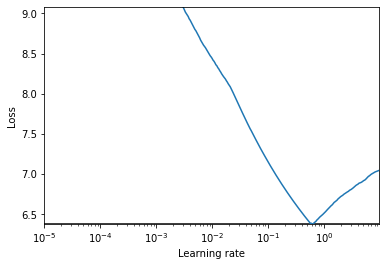

In [ ]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

Now, let's create the 1cycle scheduler class. Our loss is around 3e-1. Taking the author's advice from the previous chapter, we'll double it to 6e-1 when implementing it in our model.

In [ ]:
# 1cycle scheduler
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [ ]:
keras.backend.clear_session()
from numpy.random import seed
seed(999)
tf.random.set_seed(999) 

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=6e-1),
              metrics=["accuracy"])

In [ ]:
cifar10_1cycle_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='cifar10_1cycle.h5', save_best_only=True)
]    

In [ ]:

n_epochs = 50
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[onecycle, cifar10_1cycle_callbacks])

Epoch 1/50
352/352 [==============================] - 3s 5ms/step - loss: 2.2085 - accuracy: 0.2457 - val_loss: 1.7759 - val_accuracy: 0.3836
Epoch 2/50
352/352 [==============================] - 2s 5ms/step - loss: 1.8300 - accuracy: 0.3600 - val_loss: 1.7050 - val_accuracy: 0.3980
Epoch 3/50
352/352 [==============================] - 2s 4ms/step - loss: 1.6877 - accuracy: 0.4013 - val_loss: 1.6252 - val_accuracy: 0.4316
Epoch 4/50
352/352 [==============================] - 2s 4ms/step - loss: 1.5776 - accuracy: 0.4419 - val_loss: 1.6148 - val_accuracy: 0.4372
Epoch 5/50
352/352 [==============================] - 2s 5ms/step - loss: 1.5009 - accuracy: 0.4691 - val_loss: 1.5837 - val_accuracy: 0.4508
Epoch 6/50
352/352 [==============================] - 2s 4ms/step - loss: 1.4441 - accuracy: 0.4821 - val_loss: 1.6256 - val_accuracy: 0.4518
Epoch 7/50
352/352 [==============================] - 2s 4ms/step - loss: 1.4033 - accuracy: 0.4962 - val_loss: 1.5479 - val_accuracy: 0.4704
Epoch 

In [ ]:
model = keras.models.load_model("cifar10_1cycle.h5")
model.evaluate(X_val_scaled, y_val)

157/157 [==============================] - 1s 2ms/step - loss: 1.5078 - accuracy: 0.4884


[1.5077800750732422, 0.48840001225471497]

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5236 - accuracy: 0.4902


[1.5236462354660034, 0.490200012922287]

The accuracy is still higher than our initial model's but lower than the batch  model. As expected, batch normalization has a higher accuracy than all of the other models, though it is notably slower than all of them as well. However, all of the models seem to be overfitting quite a bit.

In an exercise like this, it's worth going with batch over the other models because while the training time is higher, it's still only a difference of a few minutes. On a larger dataset and/or deeper model, such a decision may not be easy. It becomes a matter of weighing improved accuracy versus increased training time. In some cases, an improved accuracy of a few percentage points may not warrant an increased training time of hours or even days.